In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AZ Post-2024.csv")

In [3]:
df.head()

,District ID,id,Pop20,DHouseholds,DTotal_Income,DArea,DSumAge,DTotal_Rent,DTotalCom,D20Minus,...,G10GovR,G10GovO,G08PreD,G08PreR,G08PreO,G24GuessD,G24GuessR,G28GuessD,G28GuessR,name
1,Phoenix Latinos,1,876075.0,263047.0,1.761866e+10,589241.0,27864175.0,2.876636e+08,10666829.0,296865.0,...,29873.0,2621.0,81881.0,48132.0,1662.0,154918.0,68753.0,147381.0,76290.0,Phoenix Latinos
2,Phoenix Prosperity,2,197066.0,78934.0,1.593809e+10,3192961.0,9018861.0,1.694112e+08,2367004.0,42510.0,...,47159.0,1587.0,32098.0,59413.0,785.0,55524.0,77863.0,56396.0,76991.0,Phoenix Prosperity
3,Phoenix Retirees,3,172932.0,94508.0,7.683398e+09,186647.0,10891363.0,8.520882e+07,1153677.0,12378.0,...,51743.0,1419.0,35502.0,57360.0,1677.0,48616.0,65790.0,50196.0,64210.0,Phoenix Retirees
4,Phoenix Middle Class,4,1786606.0,709105.0,8.138902e+10,2170105.0,67910392.0,1.095909e+09,23384389.0,444932.0,...,252701.0,16494.0,286662.0,352056.0,10481.0,502683.0,459227.0,510854.0,451056.0,Phoenix Middle Class
5,Phoenix Working Class,5,1437711.0,538726.0,4.363088e+10,1992145.0,54277885.0,6.655590e+08,19304485.0,376113.0,...,166893.0,12252.0,173078.0,237536.0,7949.0,296858.0,330314.0,303138.0,324034.0,Phoenix Working Class


In [4]:
import matplotlib.pyplot as plt

def plot_senate_results(district_id):
    district_data = df[df["District ID"] == district_id]
    
    if district_data.empty:
        print(f"No data found for District ID {district_id}")
        return

    # Extract values
    votes_other = district_data["G22SenO"].values[0]
    votes_republican = district_data["G22SenR"].values[0]
    votes_democratic = district_data["G22SenD"].values[0]

    # Labels and values
    labels = ["Other", "Republican", "Democratic"]
    values = [votes_other, votes_republican, votes_democratic]
    colors = ["gray", "red", "blue"]

    # Create Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title(f"2022 Senate Election Results in District {district_id}")
    plt.show()

# Example usage: Call function with a District ID
plot_senate_results(1)  # Change number to visualize other districts


No data found for District ID 1


In [20]:
import matplotlib.pyplot as plt

def plot_senate_votes(identifier):
    # Determine whether input is District ID (numeric) or Name (string)
    
        district_data = df[df["District ID"] == identifier]
    
    # Check if district is found
    if district_data.empty:
        print(f"No data found for: {identifier}")
        return

    # Extract values for Senate votes
    votes_other = district_data["G22SenO"].values[0]
    votes_republican = district_data["G22SenR"].values[0]
    votes_democrat = district_data["G22SenD"].values[0]

    # Pie chart labels and values
    labels = ["Other", "Republican", "Democrat"]
    values = [votes_other, votes_republican, votes_democrat]
    colors = ["gray", "red", "blue"]

    # Create Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title(f"Senate Vote Distribution - {district_data['id'].values[0]}")
    plt.show()

# Example usage
plot_senate_votes("Phoenix Latinos")  # Using name (case insensitive)
plot_senate_votes(1)  # Using District ID


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

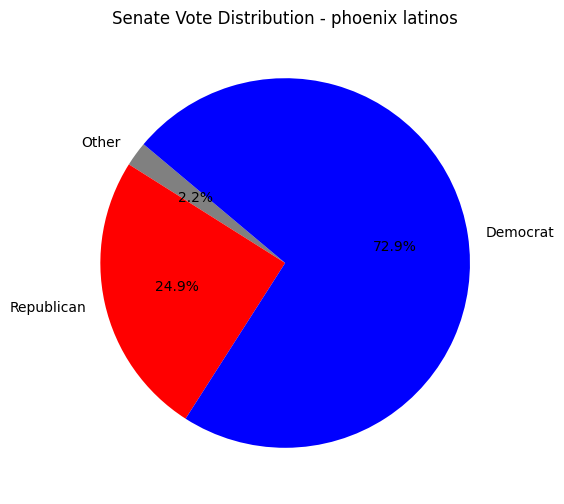

In [6]:
import matplotlib.pyplot as plt

def plot_pie_chart(df, district_id, district_column, columns, labels, colors=None, title="Pie Chart"):
    """
    Creates a pie chart for given columns in a specific district.

    Parameters:
    - df: DataFrame containing the data
    - district_id: The district ID or name to filter
    - district_column: The column used for identifying the district (e.g., 'id' or 'name')
    - columns: List of column names to include in the pie chart
    - labels: List of labels corresponding to the columns
    - colors: Optional list of colors for the pie chart
    - title: Title of the pie chart (default: "Pie Chart")
    """
    # Convert district column to string for flexible matching
    df[district_column] = df[district_column].astype(str).str.lower().str.strip()
    district_id = str(district_id).lower().strip()
    
    # Filter for the specific district
    district_data = df[df[district_column] == district_id]
    
    if district_data.empty:
        print(f"No data found for: {district_id}")
        return
    
    # Extract values for the pie chart
    values = [district_data[col].values[0] for col in columns]
    
    # Default colors if not provided
    if colors is None:
        colors = ["gray", "red", "blue", "green", "orange", "purple"]
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors[:len(columns)], startangle=140)
    plt.title(f"{title} - {district_data[district_column].values[0]}")
    plt.show()

# Example usage:
plot_pie_chart(
    df, 
    district_id="Phoenix Latinos",  # or an ID like 1
    district_column="name",  # Use 'id' if matching by ID
    columns=["G22SenO", "G22SenR", "G22SenD"],  # Columns to plot
    labels=["Other", "Republican", "Democrat"],
    title="Senate Vote Distribution"
)


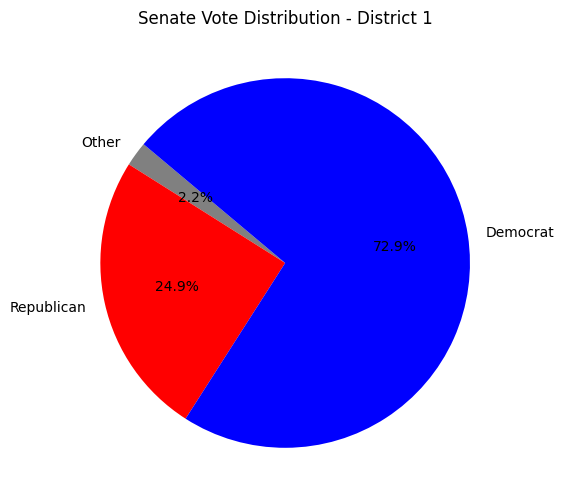

In [7]:
import matplotlib.pyplot as plt

def plot_pie_by_district(df, district_id, district_column, columns, labels, colors=None, title="Pie Chart"):
    """
    Creates a pie chart for specified columns in a district identified by district ID.

    Parameters:
    - df: DataFrame containing the data
    - district_id: The district ID to filter
    - district_column: The column used for identifying the district (e.g., 'id')
    - columns: List of column names to include in the pie chart
    - labels: List of labels corresponding to the columns
    - colors: Optional list of colors for the pie chart
    - title: Title of the pie chart (default: "Pie Chart")
    """
    # Ensure district ID is treated as string for consistency
    df[district_column] = df[district_column].astype(str).str.strip()
    district_id = str(district_id).strip()
    
    # Filter the dataframe for the given district ID
    district_data = df[df[district_column] == district_id]
    
    if district_data.empty:
        print(f"No data found for District ID: {district_id}")
        return
    
    # Extract values for the pie chart
    values = [district_data[col].values[0] for col in columns]
    
    # Default colors if not provided
    if colors is None:
        colors = ["gray", "red", "blue", "green", "orange", "purple"]
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors[:len(columns)], startangle=140)
    plt.title(f"{title} - District {district_id}")
    plt.show()

# Example usage:
plot_pie_by_district(
    df, 
    district_id="1",  # Provide the actual District ID value
    district_column="id",  # Column that stores District IDs
    columns=["G22SenO", "G22SenR", "G22SenD"],  # Columns to plot
    labels=["Other", "Republican", "Democrat"],
    title="Senate Vote Distribution"
)


In [10]:
import matplotlib.pyplot as plt

def plot_age_distribution(id):
    """
    Generates a pie chart showing the age distribution for a given district ID.

    Parameters:
    - id: The ID of the district to filter.
    """
    # Ensure 'id' column is a string for consistent filtering
    df["id"] = df["id"].astype(str).str.strip()
    id = str(id).strip()
    
    # Filter for the selected district
    district_data = df[df["id"] == id]
    
    if district_data.empty:
        print(f"No data found for ID: {id}")
        return

    # Define columns for age groups
    age_columns = ["D20Minus", "D20to40", "D40to65", "D65Plus"]
    labels = ["Under 20", "20-40", "40-65", "65+"]
    colors = ["yellow", "green", "blue", "red"]

    # Extract values
    values = [district_data[col].values[0] for col in age_columns]
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title(f"Age Distribution - ID {id}")
    plt.show()

# Example usage:
plot_age_distribution("Phoenix Working Class")  # Replace "1" with an actual ID


No data found for ID: Phoenix Working Class


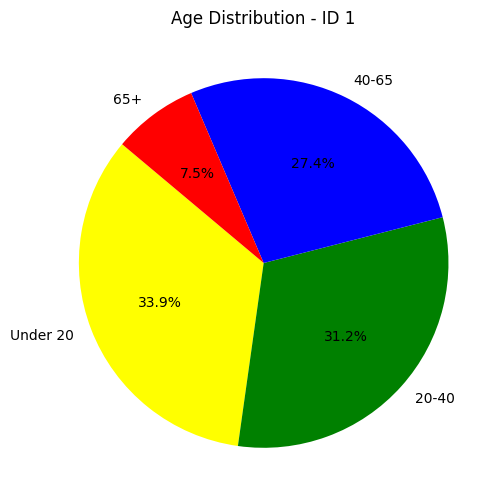

In [11]:
import matplotlib.pyplot as plt

def plot_age_distribution(district_id):
    """
    Generates a pie chart showing the age distribution for a given district ID.

    Parameters:
    - district_id: The ID of the district to filter.
    """
    # Ensure column name is correctly capitalized
    id_column = "id" if "id" in df.columns else "ID"  # Adjust if needed
    
    # Convert 'id' column to string for consistent filtering
    df[id_column] = df[id_column].astype(str).str.strip()
    district_id = str(district_id).strip()
    
    # Filter the dataframe for the given district ID
    district_data = df[df[id_column] == district_id]
    
    if district_data.empty:
        print(f"No data found for ID: {district_id}")
        print(f"Available IDs: {df[id_column].unique()[:10]}")  # Show sample valid IDs
        return

    # Define columns for age groups
    age_columns = ["D20Minus", "D20to40", "D40to65", "D65Plus"]
    
    # Ensure all age columns exist
    missing_columns = [col for col in age_columns if col not in df.columns]
    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return
    
    labels = ["Under 20", "20-40", "40-65", "65+"]
    colors = ["yellow", "green", "blue", "red"]

    # Extract values
    values = [district_data[col].values[0] for col in age_columns]
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title(f"Age Distribution - ID {district_id}")
    plt.show()

# Example usage:
plot_age_distribution("1")  # Replace "1" with an actual ID from the dataset


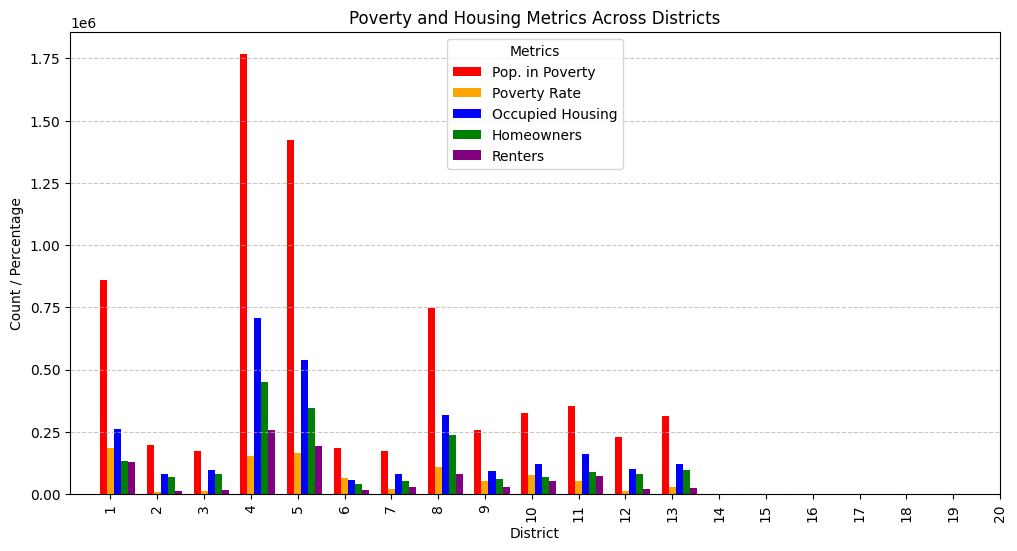

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_poverty_housing_distribution():
    """
    Generates a grouped bar chart showing the distribution of poverty and housing-related metrics
    across all districts using columns:
    ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    """
    # Define relevant columns
    columns = ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    labels = ["Pop. in Poverty", "Poverty Rate", "Occupied Housing", "Homeowners", "Renters"]
    colors = ["red", "orange", "blue", "green", "purple"]

    # Ensure required columns exist
    required_columns = ["id"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Convert 'id' column to string for proper labeling
    df["id"] = df["id"].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df))  # Number of districts
    width = 0.15  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(12, 6))

    for i, col in enumerate(columns):
        plt.bar(x + i * width, df[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("District")
    plt.ylabel("Count / Percentage")
    plt.title("Poverty and Housing Metrics Across Districts")
    plt.xticks(x + width, df["id"], rotation=90)  # Rotate labels for readability
    plt.legend(title="Metrics")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_poverty_housing_distribution()


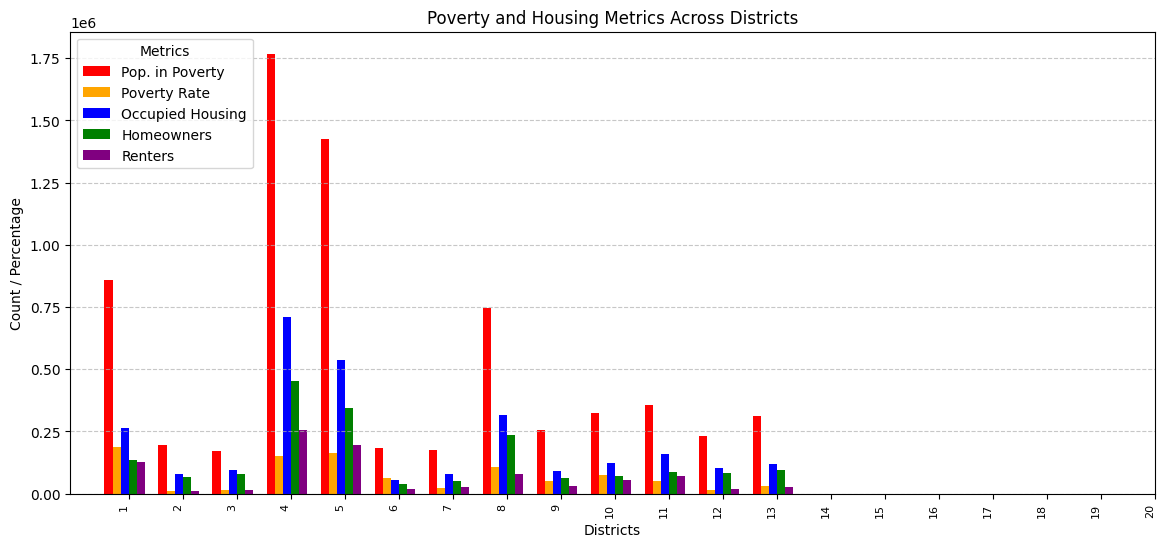

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_poverty_housing_distribution():
    """
    Generates a grouped bar chart showing the distribution of poverty and housing-related metrics
    across all districts using columns:
    ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    """
    # Define relevant columns
    columns = ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    labels = ["Pop. in Poverty", "Poverty Rate", "Occupied Housing", "Homeowners", "Renters"]
    colors = ["red", "orange", "blue", "green", "purple"]

    # Ensure required columns exist
    required_columns = ["id"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Convert 'id' column to string for proper labeling
    df["id"] = df["id"].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df))  # Number of districts
    width = 0.15  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(14, 6))

    for i, col in enumerate(columns):
        plt.bar(x + i * width, df[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("Districts")
    plt.ylabel("Count / Percentage")
    plt.title("Poverty and Housing Metrics Across Districts")
    plt.xticks(x + (width * (len(columns) / 2)), df["id"], rotation=90, ha="right", fontsize=8)  # Use district names
    plt.legend(title="Metrics")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_poverty_housing_distribution()


In [21]:
df["District ID"]

1           Phoenix Latinos
2        Phoenix Prosperity
3          Phoenix Retirees
4      Phoenix Middle Class
5     Phoenix Working Class
6             Native Tribes
7      Flagstaff and Sedona
8             Rural Arizona
9            Border Latinos
10           Tuscon Latinos
11      Tucson Middle Class
12        Tucson Prosperity
13        Southern Outposts
14                      NaN
15                      NaN
16                      NaN
17                      NaN
18                      NaN
19                      NaN
20                      NaN
Name: District ID, dtype: object

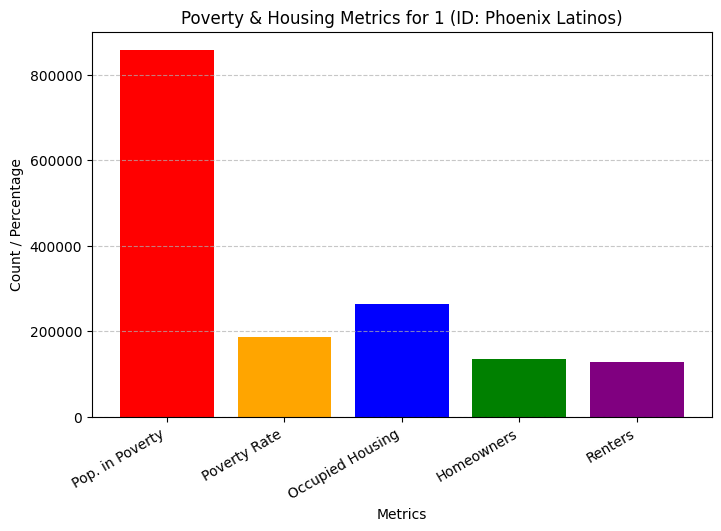

In [ ]:
import matplotlib.pyplot as plt

def plot_poverty_housing_by_district(district_id):
    """
    Generates a bar chart for a single district using its District ID.
    
    Parameters:
    - district_id: The identifier for filtering the data.
    """
    # Define relevant columns
    columns = ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    labels = ["Pop. in Poverty", "Poverty Rate", "Occupied Housing", "Homeowners", "Renters"]
    colors = ["red", "orange", "blue", "green", "purple"]

    # Ensure required columns exist
    required_columns = ["District ID", "id"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Convert 'District ID' column to string for proper filtering
    df["District ID"] = df["District ID"].astype(str).str.strip()
    district_id = str(district_id).strip()

    # Filter data for the given District ID
    district_data = df[df["District ID"] == district_id]

    if district_data.empty:
        print(f"No data found for District ID: {district_id}")
        print(f"Available District IDs: {df['District ID'].unique()[:10]}")  # Show sample valid IDs
        return

    # Get district name for title
    district_name = district_data["id"].values[0]  # Extract the corresponding district name

    # Extract values for the selected district
    values = [district_data[col].values[0] for col in columns]

    # Create the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=colors)

    # Formatting the chart
    plt.xlabel("Metrics")
    plt.ylabel("Count / Percentage")
    plt.title(f"Poverty & Housing Metrics for {district_name} (ID: {district_id})")
    plt.xticks(rotation=30, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_poverty_housing_by_district("Phoenix Latinos")  

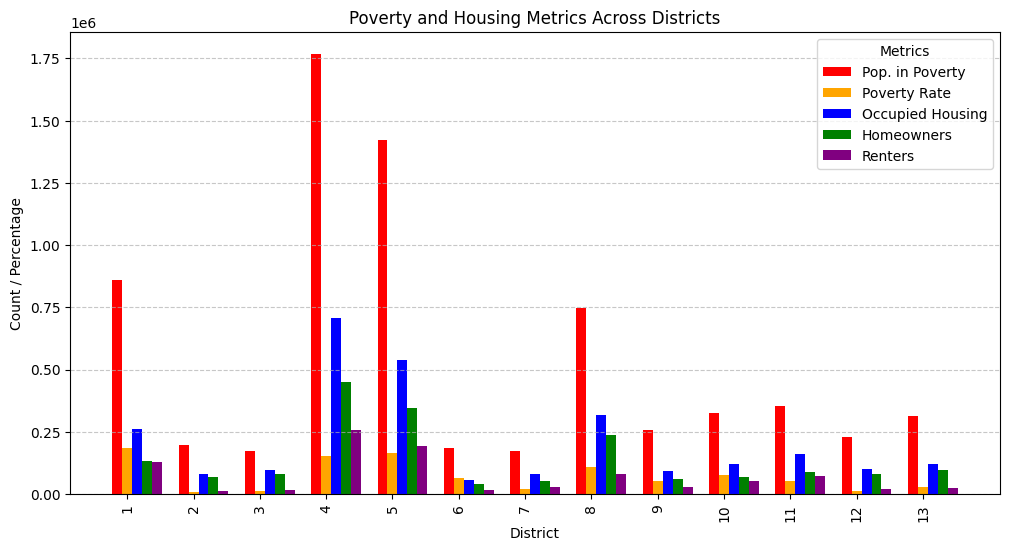

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_poverty_housing_distribution():
    """
    Generates a grouped bar chart showing the distribution of poverty and housing-related metrics
    across all districts using columns:
    ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    """
    # Define relevant columns
    columns = ["DPopPov", "DPoverty", "DOHousing", "DOwner", "DRenter"]
    labels = ["Pop. in Poverty", "Poverty Rate", "Occupied Housing", "Homeowners", "Renters"]
    colors = ["red", "orange", "blue", "green", "purple"]

    # Ensure required columns exist
    required_columns = ["id"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Convert 'id' column to string for proper labeling
    df["id"] = df[""].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df))  # Number of districts
    width = 0.15  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(12, 6))

    for i, col in enumerate(columns):
        plt.bar(x + i * width, df[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("District")
    plt.ylabel("Count / Percentage")
    plt.title("Poverty and Housing Metrics Across Districts")
    plt.xticks(x + width, df["id"], rotation=90)  # Rotate labels for readability
    plt.legend(title="Metrics")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_poverty_housing_distribution()


In [28]:
# Remove rows where 'District ID' is NaN or empty
df = df.dropna(subset=["District ID"])  # Drops NaN values
df = df[df["District ID"].astype(str).str.strip() != ""]  # Drops blank values

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display first few rows to confirm
print(df.head())


             District ID id      Pop20  DHouseholds  DTotal_Income      DArea  \
0        Phoenix Latinos  1   876075.0     263047.0   1.761866e+10   589241.0   
1     Phoenix Prosperity  2   197066.0      78934.0   1.593809e+10  3192961.0   
2       Phoenix Retirees  3   172932.0      94508.0   7.683398e+09   186647.0   
3   Phoenix Middle Class  4  1786606.0     709105.0   8.138902e+10  2170105.0   
4  Phoenix Working Class  5  1437711.0     538726.0   4.363088e+10  1992145.0   

      DSumAge   DTotal_Rent   DTotalCom  D20Minus  ...   G10GovR  G10GovO  \
0  27864175.0  2.876636e+08  10666829.0  296865.0  ...   29873.0   2621.0   
1   9018861.0  1.694112e+08   2367004.0   42510.0  ...   47159.0   1587.0   
2  10891363.0  8.520882e+07   1153677.0   12378.0  ...   51743.0   1419.0   
3  67910392.0  1.095909e+09  23384389.0  444932.0  ...  252701.0  16494.0   
4  54277885.0  6.655590e+08  19304485.0  376113.0  ...  166893.0  12252.0   

    G08PreD   G08PreR  G08PreO  G24GuessD  G24Gues

In [33]:
df.head(20)

,District ID,id,Pop20,DHouseholds,DTotal_Income,DArea,DSumAge,DTotal_Rent,DTotalCom,D20Minus,...,G10GovR,G10GovO,G08PreD,G08PreR,G08PreO,G24GuessD,G24GuessR,G28GuessD,G28GuessR,name
0,Phoenix Latinos,1,876075.0,263047.0,1.761866e+10,589241.0,27864175.0,2.876636e+08,10666829.0,296865.0,...,29873.0,2621.0,81881.0,48132.0,1662.0,154918.0,68753.0,147381.0,76290.0,phoenix latinos
1,Phoenix Prosperity,2,197066.0,78934.0,1.593809e+10,3192961.0,9018861.0,1.694112e+08,2367004.0,42510.0,...,47159.0,1587.0,32098.0,59413.0,785.0,55524.0,77863.0,56396.0,76991.0,phoenix prosperity
2,Phoenix Retirees,3,172932.0,94508.0,7.683398e+09,186647.0,10891363.0,8.520882e+07,1153677.0,12378.0,...,51743.0,1419.0,35502.0,57360.0,1677.0,48616.0,65790.0,50196.0,64210.0,phoenix retirees
3,Phoenix Middle Class,4,1786606.0,709105.0,8.138902e+10,2170105.0,67910392.0,1.095909e+09,23384389.0,444932.0,...,252701.0,16494.0,286662.0,352056.0,10481.0,502683.0,459227.0,510854.0,451056.0,phoenix middle class
4,Phoenix Working Class,5,1437711.0,538726.0,4.363088e+10,1992145.0,54277885.0,6.655590e+08,19304485.0,376113.0,...,166893.0,12252.0,173078.0,237536.0,7949.0,296858.0,330314.0,303138.0,324034.0,phoenix working class
5,Native Tribes,6,186612.0,56174.0,2.799127e+09,87889069.0,6633776.0,2.094530e+07,1360205.0,58508.0,...,10428.0,945.0,39311.0,15150.0,248.0,59366.0,22191.0,56265.0,25292.0,native tribes
6,Flagstaff and Sedona,7,186808.0,78364.0,6.990625e+09,15709570.0,8038624.0,9.501853e+07,1533682.0,40099.0,...,34163.0,1972.0,40048.0,40907.0,1062.0,55350.0,54047.0,55224.0,54173.0,flagstaff and sedona
7,Rural Arizona,8,772026.0,316894.0,2.208581e+10,143606920.0,34795971.0,2.766407e+08,7017747.0,159579.0,...,142302.0,6918.0,83593.0,168282.0,3000.0,107468.0,271548.0,105119.0,273897.0,rural arizona
8,Border Latinos,9,276827.0,91215.0,6.071963e+09,26273673.0,10241697.0,7.578530e+07,2144616.0,77933.0,...,21977.0,973.0,31456.0,29834.0,307.0,43878.0,46373.0,38491.0,51760.0,border latinos
9,Tuscon Latinos,10,328664.0,122089.0,7.058363e+09,765132.0,11753732.0,1.076393e+08,3509903.0,91038.0,...,20691.0,1940.0,55444.0,28897.0,866.0,81310.0,36759.0,77537.0,40532.0,tuscon latinos


In [35]:
print(df["District ID"].isna().sum())  # Count NaN values in "District ID"
print(df[df["District ID"].isna()])  # Display rows where "District ID" is NaN


0
Empty DataFrame
Columns: [District ID, id, Pop20, DHouseholds, DTotal_Income, DArea, DSumAge, DTotal_Rent, DTotalCom, D20Minus, D20to40, D40to65, D65Plus, D0_25k, D25k_50k, D50k_100k, D100k_200k, D200kPlus, DGINI, DOc, DOcOth, DOc1Det, DOc1Att, DOc2_10, DOc10_50, DOc50_Plus, DWhite, DBlack, DNative, DAsian, DPacific, DOther, DMultiracial, DLatino, DVAP, DWhiteVAP, DBlackVAP, DNativeVAP, DAsianVAP, DPacificVAP, DOtherVAP, DMultiracialVAP, DLatinoVAP, DPop10, D10White, D10Black, D10Native, D10Asian, D10Pacific, D10Other, D10Multiracial, D10Latino, D10PCI, D00PCI, DPop00, D00White, D00Black, D00Native, D00Asian, D00Pacific, D00Other, D00Multiracial, D00Latino, DPop90, D90White, D90Black, D90Native, D90Asian, D90Other, D90Latino, D5_or_older, DEnglishOnly, DLimitedEnglish, DSpanish, DIndoEuropean, DAsianPacific, DOtherLanguage, D25_or_older, DHighschool, DBachelors, DGraduate, DNonInstit, DInsured, DUninsured, DMale, DFemale, DVeteran, DWorker_16_up, DCCar, DCTransit, DCWalk, DCBike, DCO

In [37]:
# Convert column to string and strip spaces
df["District ID"] = df["District ID"].astype(str).str.strip()

# Replace literal 'nan' strings that may exist after conversion
df = df[df["District ID"].str.lower() != "nan"]  

# Drop true NaN values
df = df.dropna(subset=["District ID"])

# Drop empty strings
df = df[df["District ID"] != ""]

# Reset index
df.reset_index(drop=True, inplace=True)

# Confirm changes
print(df.head())


             District ID id      Pop20  DHouseholds  DTotal_Income      DArea  \
0        Phoenix Latinos  1   876075.0     263047.0   1.761866e+10   589241.0   
1     Phoenix Prosperity  2   197066.0      78934.0   1.593809e+10  3192961.0   
2       Phoenix Retirees  3   172932.0      94508.0   7.683398e+09   186647.0   
3   Phoenix Middle Class  4  1786606.0     709105.0   8.138902e+10  2170105.0   
4  Phoenix Working Class  5  1437711.0     538726.0   4.363088e+10  1992145.0   

      DSumAge   DTotal_Rent   DTotalCom  D20Minus  ...   G10GovR  G10GovO  \
0  27864175.0  2.876636e+08  10666829.0  296865.0  ...   29873.0   2621.0   
1   9018861.0  1.694112e+08   2367004.0   42510.0  ...   47159.0   1587.0   
2  10891363.0  8.520882e+07   1153677.0   12378.0  ...   51743.0   1419.0   
3  67910392.0  1.095909e+09  23384389.0  444932.0  ...  252701.0  16494.0   
4  54277885.0  6.655590e+08  19304485.0  376113.0  ...  166893.0  12252.0   

    G08PreD   G08PreR  G08PreO  G24GuessD  G24Gues

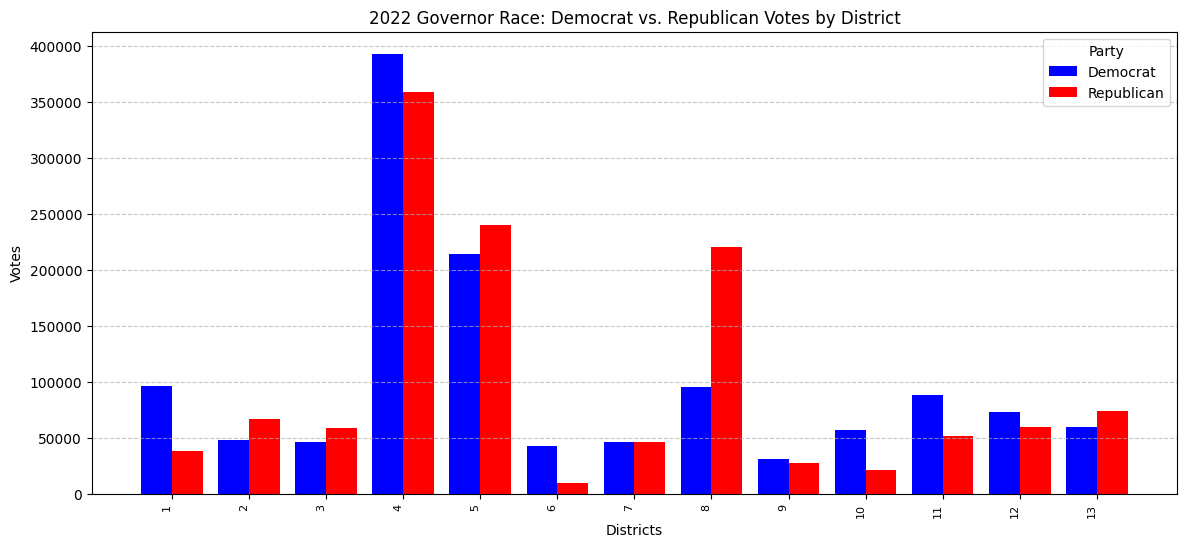

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_governor_race():
    """
    Generates a grouped bar chart comparing Democratic (G22GovD) and Republican (G22GovR) votes
    across different districts.
    """
    # Define relevant columns
    columns = ["G22GovD", "G22GovR"]
    labels = ["Democrat", "Republican"]
    colors = ["blue", "red"]

    # Ensure required columns exist
    required_columns = ["District ID", "id"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Drop rows where "District ID" is missing
    df_cleaned = df.dropna(subset=["District ID"])

    # Convert 'District ID' to string for labeling
    df_cleaned["District ID"] = df_cleaned["District ID"].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df_cleaned))  # Number of districts
    width = 0.4  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(14, 6))

    for i, col in enumerate(columns):
        plt.bar(x + (i * width) - (width / 2), df_cleaned[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("Districts")
    plt.ylabel("Votes")
    plt.title("2022 Governor Race: Democrat vs. Republican Votes by District")
    plt.xticks(x, df_cleaned["id"], rotation=90, ha="right", fontsize=8)  # Use district names
    plt.legend(title="Party")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_governor_race()


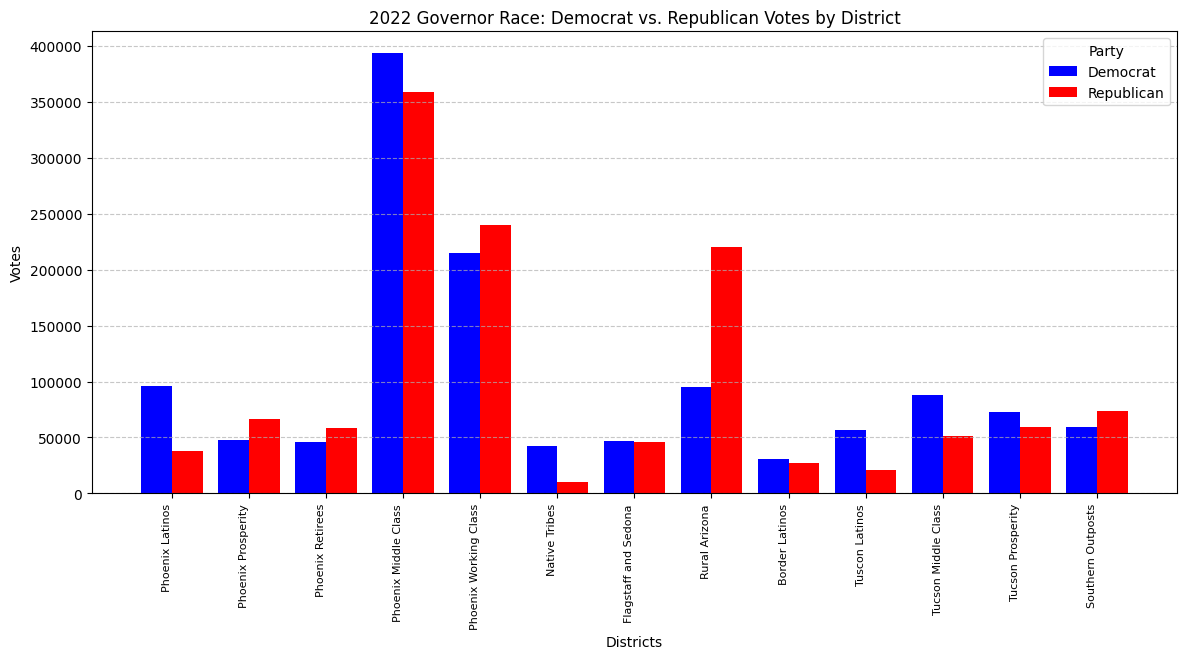

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_governor_race():
    """
    Generates a grouped bar chart comparing Democratic (G22GovD) and Republican (G22GovR) votes
    across different districts using 'District ID' as labels.
    """
    # Define relevant columns
    columns = ["G22GovD", "G22GovR"]
    labels = ["Democrat", "Republican"]
    colors = ["blue", "red"]

    # Ensure required columns exist
    required_columns = ["District ID"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Drop rows where "District ID" is missing
    df_cleaned = df.dropna(subset=["District ID"])

    # Convert 'District ID' to string for labeling
    df_cleaned["District ID"] = df_cleaned["District ID"].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df_cleaned))  # Number of districts
    width = 0.4  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(14, 6))

    for i, col in enumerate(columns):
        plt.bar(x + (i * width) - (width / 2), df_cleaned[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("Districts")
    plt.ylabel("Votes")
    plt.title("2022 Governor Race: Democrat vs. Republican Votes by District")
    plt.xticks(x, df_cleaned["District ID"], rotation=90, ha="right", fontsize=8)  # Use 'District ID' as labels
    plt.legend(title="Party")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_governor_race()


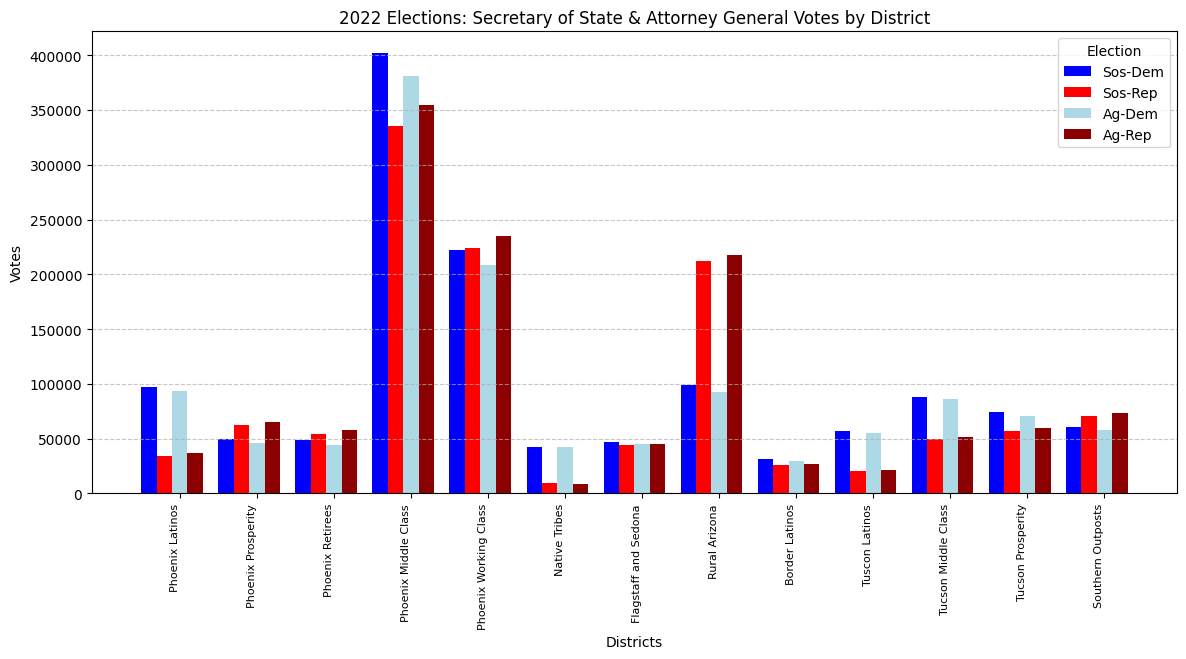

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sos_ag_race():
    """
    Generates a grouped bar chart comparing Democratic (G22SosD, G22AgD) and 
    Republican (G22SosR, G22AgR) votes for Secretary of State & Attorney General 
    across different districts using 'District ID' as labels.
    """
    # Define relevant columns
    columns = ["G22SosD", "G22SosR", "G22AgD", "G22AgR"]
    labels = ["Sos-Dem", "Sos-Rep", "Ag-Dem", "Ag-Rep"]
    colors = ["blue", "red", "lightblue", "darkred"]

    # Ensure required columns exist
    required_columns = ["District ID"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Drop rows where "District ID" is missing
    df_cleaned = df.dropna(subset=["District ID"])

    # Convert 'District ID' to string for labeling
    df_cleaned["District ID"] = df_cleaned["District ID"].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df_cleaned))  # Number of districts
    width = 0.2  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(14, 6))

    for i, col in enumerate(columns):
        plt.bar(x + (i * width) - (width * (len(columns) / 2)), df_cleaned[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("Districts")
    plt.ylabel("Votes")
    plt.title("2022 Elections: Secretary of State & Attorney General Votes by District")
    plt.xticks(x, df_cleaned["District ID"], rotation=90, ha="right", fontsize=8)  # Use 'District ID' as labels
    plt.legend(title="Election")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_sos_ag_race()


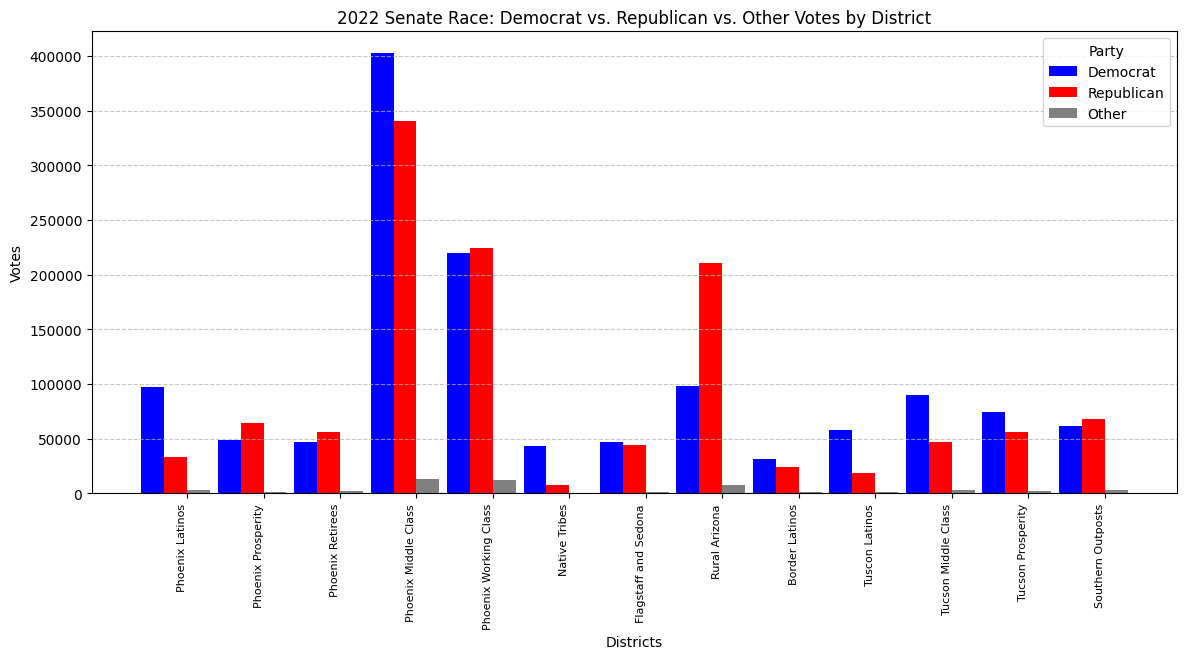

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def plot_senate_race():
    """
    Generates a grouped bar chart comparing Democratic (G22SenD), 
    Republican (G22SenR), and Other (G22SenO) votes across different districts 
    using 'District ID' as labels.
    """
    # Define relevant columns
    columns = ["G22SenD", "G22SenR", "G22SenO"]
    labels = ["Democrat", "Republican", "Other"]
    colors = ["blue", "red", "gray"]

    # Ensure required columns exist
    required_columns = ["District ID"] + columns
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return

    # Drop rows where "District ID" is missing
    df_cleaned = df.dropna(subset=["District ID"])

    # Convert 'District ID' to string for labeling
    df_cleaned["District ID"] = df_cleaned["District ID"].astype(str).str.strip()

    # Set positions for groups of bars
    x = np.arange(len(df_cleaned))  # Number of districts
    width = 0.3  # Width of bars

    # Create the bar chart
    plt.figure(figsize=(14, 6))

    for i, col in enumerate(columns):
        plt.bar(x + (i * width) - (width * (len(columns) / 2)), df_cleaned[col], width=width, label=labels[i], color=colors[i])

    # Formatting the chart
    plt.xlabel("Districts")
    plt.ylabel("Votes")
    plt.title("2022 Senate Race: Democrat vs. Republican vs. Other Votes by District")
    plt.xticks(x, df_cleaned["District ID"], rotation=90, ha="right", fontsize=8)  # Use 'District ID' as labels
    plt.legend(title="Party")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()

# Example usage:
plot_senate_race()

